# Surface concentrations

In [5]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from mpl_toolkits.basemap import Basemap, cm
import cmocean
import netCDF4 as nc
from datetime import date
import xarray as xr

%matplotlib inline

###### Parameters:

In [6]:
imin, imax = 1480, 2180
jmin, jmax = 160, 800
isize = imax - imin
jsize = jmax - jmin

# model results:
year = 2002
# results_folder1 = '/data/brogalla/run_storage/Mn-set4-202004/ref-'+str(year)+'/'
results_folder1 = '/data/brogalla/run_storage/spin-up0-ANHA4-base/'

In [7]:
stn_i = np.array([104-1, 100, 91, 175, 175, 233, 214, 352, 242, 458, 508, 547, 629])
stn_j = np.array([370, 365, 353, 311, 326, 313, 281, 281, 364, 332, 384, 457, 471])
stn_n = np.array(['CAA1','CAA2','CAA3','CAA4','CAA5','CAA6','CAA7',
                  'CAA8','CAA9', 'CB1','CB2','CB3','CB4'])

###### Load files:

In [8]:
mask      = xr.open_dataset('/ocean/brogalla/GEOTRACES/data/ANHA12/ANHA12_mesh1.nc')
tmask     = mask['tmask'][0,:,imin:imax,jmin:jmax].values
lons      = mask['nav_lon'][imin:imax,jmin:jmax].values
lats      = mask['nav_lat'][imin:imax,jmin:jmax].values
land_mask = np.ma.masked_where((tmask[:,:,:] > 0.1), tmask[:,:,:]) 

In [9]:
mask_ANHA4      = xr.open_dataset('/data/brogalla/ANHA4/ANHA4_mask.nc')
tmask_ANHA4     = mask_ANHA4['tmask'][0,:,:,:].values
land_mask_ANHA4 = np.ma.masked_where((tmask_ANHA4[:,:,:] > 0.1), tmask_ANHA4[:,:,:]) 

In [10]:
ANHA4      = xr.open_dataset('/data/brogalla/ANHA4/ANHA4_mesh_zgr.nc')
lons_ANHA4 = ANHA4['nav_lon'].values
lats_ANHA4 = ANHA4['nav_lat'].values

In [11]:
results1  = xr.open_dataset(f'{results_folder1}ANHA12_EXH006_1ts_20020101_20021231_ptrc_T_2002010101-2002010101.nc')

In [12]:
ts = 5
# shows up time step = 15 in file 01
dissolmn1 = results1['dissolmn'][ts,:,:,:].values*10**9 # nM units
oxidismn1 = results1['oxidismn'][ts,:,:,:].values*10**9 # nM units

##### Functions:

In [13]:
print(np.mean(dissolmn1[16,74:77,364:366]), np.amax(dissolmn1[16,74:77,364:366]))
print(np.mean(dissolmn1[16,70:76,364:366]), np.amax(dissolmn1[16,70:76,364:366]))

2.78334081708446 2.8206745827930035
2.7181880265144307 2.7927122836501894


In [17]:
def plot_layer(month, layer, variable, vmin=0,vmax=35, savefig=False):
    
    plot_var = variable[layer,:,:]
    
#     fig, ax1, proj1 = pickle.load(open('/ocean/brogalla/GEOTRACES/pickles/mn-reference2.pickle','rb'))
#     fig, ax1, proj1 = pickle.load(open('/ocean/brogalla/GEOTRACES/pickles/lancaster-zoom.pickle','rb'))
    fig, ax1, proj1 = pickle.load(open('/ocean/brogalla/GEOTRACES/pickles/lancaster-zoom-noland.pickle','rb'))

    x, y = proj1(lons, lats)

    contour = proj1.contourf(x, y, plot_var, np.arange(vmin,vmax+1,1),\
                             cmap=cmocean.cm.thermal, vmin=vmin, vmax=vmax, extend='both')
    
    #ANHA12 land mask:
#     proj1.contourf(x, y, land_mask[layer,:,:], cmap=cmocean.cm.ice_r)
    proj1.contourf(x[1:,1:], y[1:,1:], land_mask[layer,:-1,:-1], cmap=cmocean.cm.ice_r)

    # ANHA4 land mask:
#     x4, y4 = proj1(lons_ANHA4, lats_ANHA4)
#     proj1.contourf(x4, y4, land_mask_ANHA4[layer,:,:], cmap=cmocean.cm.ice_r)
    
#     proj1.plot(x[76,365],y[76,365],'*w', markersize=5,zorder=6)
    proj1.plot([x[72,358], x[80,358]],[y[72,358], y[80,358]],'-c', zorder=6)
    proj1.plot([x[72,366], x[80,366]],[y[72,366], y[80,366]],'-c', zorder=6)
    proj1.plot([x[72,358], x[72,366]],[y[72,358], y[72,366]],'-c', zorder=6)
    proj1.plot([x[80,358], x[80,366]],[y[80,358], y[80,366]],'-c', zorder=6)
    
    proj1.plot([x[74,368], x[77,368]],[y[74,368], y[77,368]],'-w', zorder=6)
    proj1.plot([x[74,366], x[77,366]],[y[74,366], y[77,366]],'-w', zorder=6)
    proj1.plot([x[74,368], x[74,366]],[y[74,368], y[74,366]],'-w', zorder=6)
    proj1.plot([x[77,368], x[77,366]],[y[77,368], y[77,366]],'-w', zorder=6)
    
    proj1.plot([x[80,353], x[86,353]],[y[80,353], y[86,353]],'--c', zorder=6)
    proj1.plot([x[80,358], x[86,358]],[y[80,358], y[86,358]],'--c', zorder=6)
    proj1.plot([x[80,353], x[80,358]],[y[80,353], y[80,358]],'--c', zorder=6)
    proj1.plot([x[86,353], x[86,358]],[y[86,353], y[86,358]],'--c', zorder=6)

    proj1.plot([x[80,358], x[86,358]],[y[80,358], y[86,358]],'--w', zorder=6)
    proj1.plot([x[80,361], x[86,361]],[y[80,361], y[86,361]],'--w', zorder=6)
    proj1.plot([x[80,358], x[80,361]],[y[80,358], y[80,361]],'--w', zorder=6)
    proj1.plot([x[86,358], x[86,361]],[y[86,358], y[86,361]],'--w', zorder=6)
    
    cbar_ax = fig.add_axes([0.92, 0.14, 0.04, 0.6])
    cbar    = fig.colorbar(contour, cax=cbar_ax)#, ticks=np.arange(0,35,5))#[0,2,4,6,8,10,12])
    cbar.set_label('Dissolved Mn [nM]', fontsize=8) 
    cbar_ax.tick_params(axis='both', which='major', labelsize=8)
    
    figure = plt.gcf()
    figure.set_size_inches(4.5*3.5, 3.7*2.5)
    
    
    if savefig:
        figure.savefig('/ocean/brogalla/GEOTRACES/figures/paper1/A10-profile-area-map.png', \
                       bbox_inches='tight', dpi=300)
        figure.savefig('/ocean/brogalla/GEOTRACES/figures/paper1/A10-profile-area-map.svg', \
                       bbox_inches='tight', dpi=300, format='svg')
    
    return

##### Figures of surface concentrations:

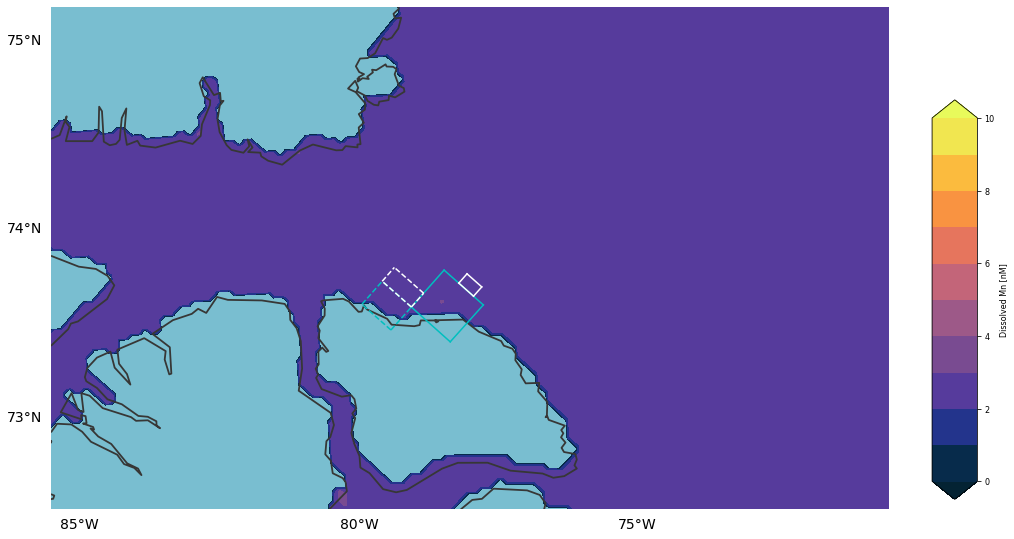

In [18]:
plot_layer(0,11,dissolmn1,vmin=0,vmax=10, savefig=False)

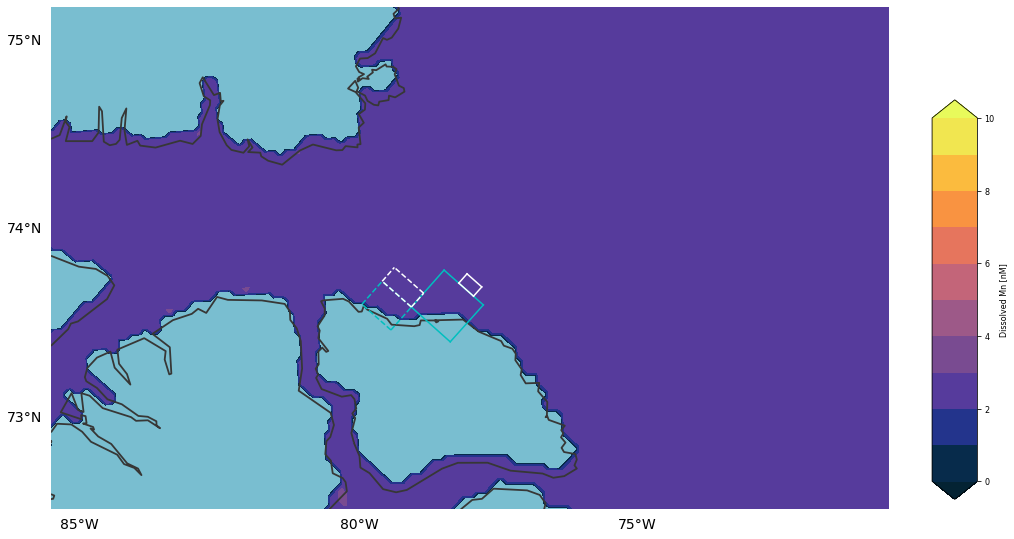

In [19]:
plot_layer(0,0,dissolmn1,vmin=0,vmax=10, savefig=False)

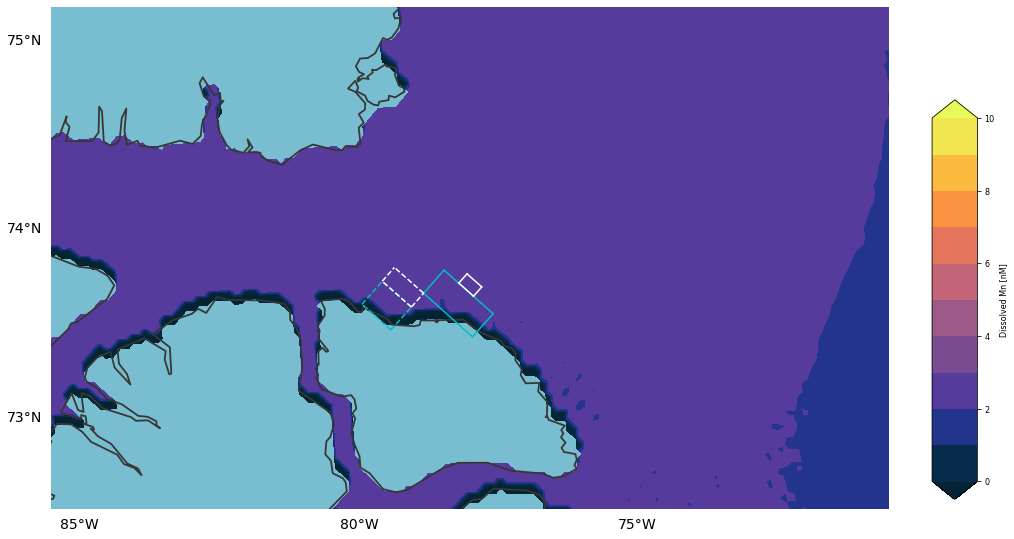

In [14]:
plot_layer(0,20,dissolmn1,vmin=0,vmax=10, savefig=False)

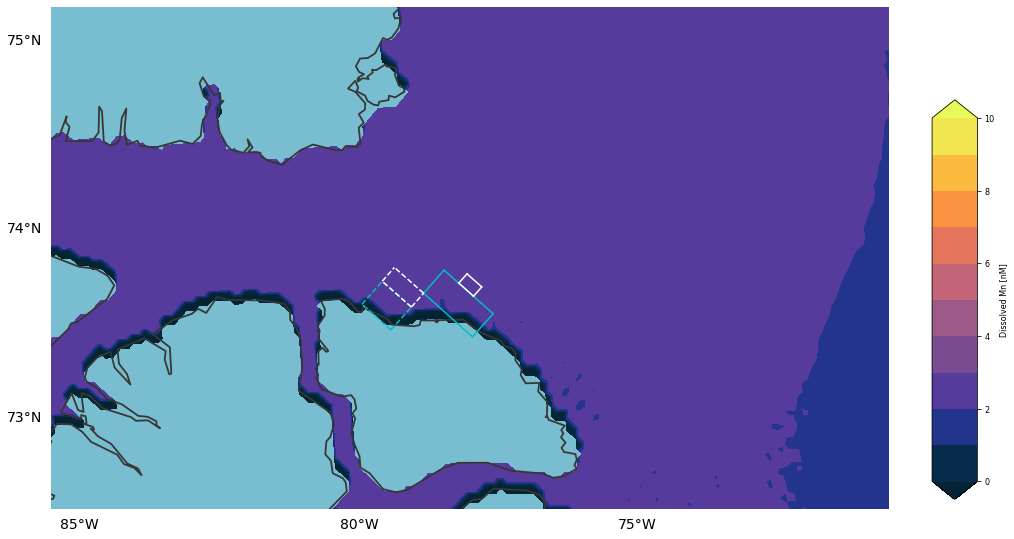

In [15]:
plot_layer(0,20,dissolmn1,vmin=0,vmax=10, savefig=False)

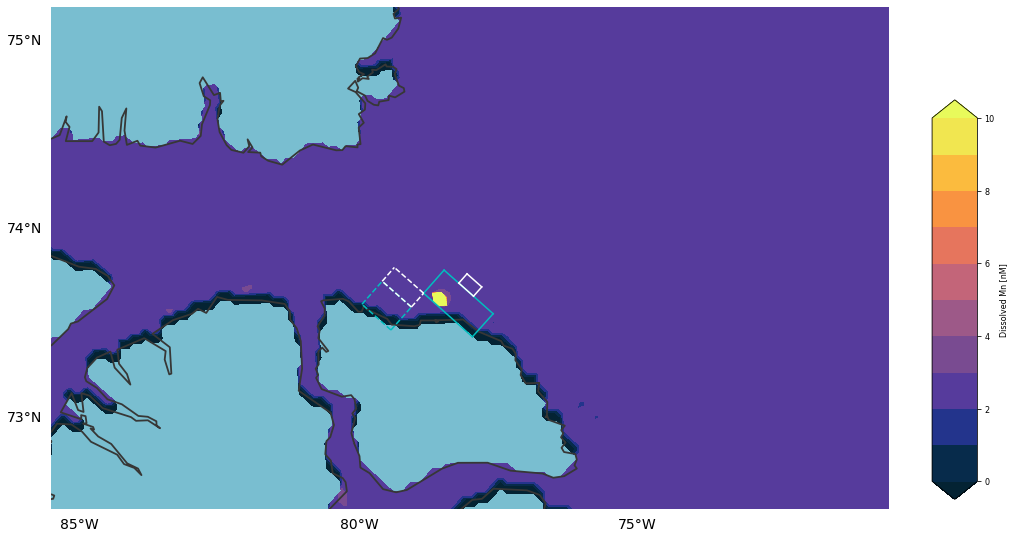

In [16]:
plot_layer(0,0,dissolmn1,vmin=0,vmax=10, savefig=False)

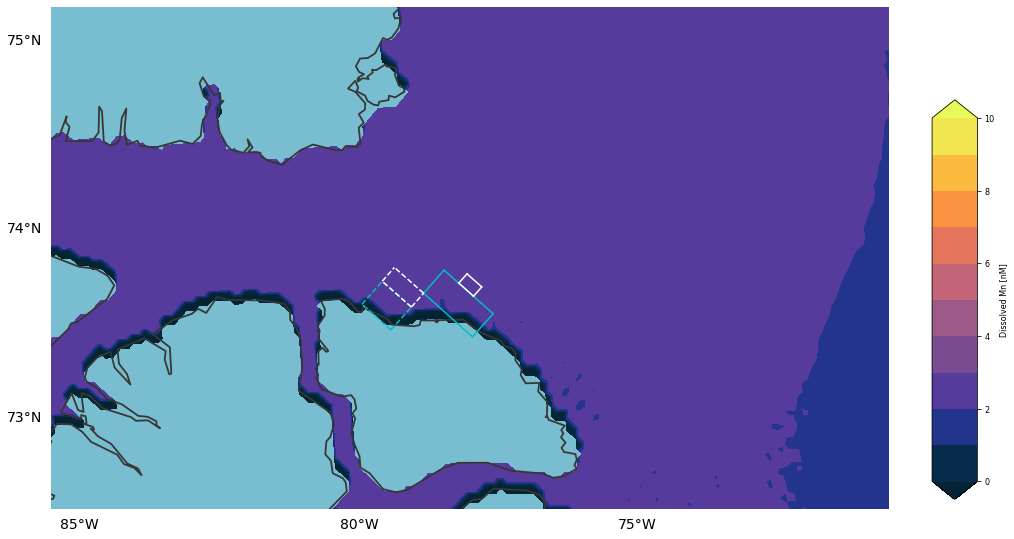

In [17]:
plot_layer(0,20,dissolmn1,vmin=0,vmax=10, savefig=False)